In [668]:
import pandas as pd
import numpy as np

In [669]:
# reading movie data and user rating data
movies_df = pd.read_csv('data/movies_metadata.csv',usecols=['id','title'])

rating_df = pd.read_csv('data/ratings_small.csv',usecols=['userId', 'movieId', 'rating'],
dtype={'userId': 'int32', 'movieId': 'int32', 'rating': 'float32'})

In [670]:
# reading movie data and user rating data
movies_df = pd.read_csv('data/movies_metadata.csv',usecols=['id','title'])

rating_df = pd.read_csv('data/ratings_small.csv',usecols=['userId', 'movieId', 'rating'],
dtype={'userId': 'int32', 'movieId': 'int32', 'rating': 'float32'})

In [671]:
# drops Nan values
movies_df.dropna(inplace=True)

# defines Dtype of id
movies_df["id"] = movies_df['id'].astype(pd.Int64Dtype())

# renames id to movieId for later merge
movies_df = movies_df.rename(columns={'id' : 'movieId'})

movies_df

,movieId,title
0,862,Toy Story
1,8844,Jumanji
2,15602,Grumpier Old Men
3,31357,Waiting to Exhale
4,11862,Father of the Bride Part II
...,...,...
45461,439050,Subdue
45462,111109,Century of Birthing
45463,67758,Betrayal
45464,227506,Satan Triumphant


In [672]:
rating_df.head()

,userId,movieId,rating
0,1,31,2.500
1,1,1029,3.000
2,1,1061,3.000
3,1,1129,2.000
4,1,1172,4.000


In [673]:
# merges the to dataframes
df = pd.merge(rating_df,movies_df,on='movieId')
df.head()

,userId,movieId,rating,title
0,1,1371,2.500,Rocky III
1,4,1371,4.000,Rocky III
2,7,1371,3.000,Rocky III
3,19,1371,4.000,Rocky III
4,21,1371,3.000,Rocky III


In [674]:
#combine_movie_rating = df.dropna(axis = 0, subset = ['title'])

# groups all of same title, counts all the ratings and remanes ratings to totalRatingCount
movie_ratingCount = (df.
     groupby(by = ['title'])['rating'].
     count().
     reset_index().
     rename(columns = {'rating': 'totalRatingCount'})
     [['title', 'totalRatingCount']]
    )
movie_ratingCount.head()

,title,totalRatingCount
0,!Women Art Revolution,2
1,'Gator Bait,1
2,'Twas the Night Before Christmas,2
3,...And God Created Woman,1
4,00 Schneider - Jagd auf Nihil Baxter,2


In [675]:
# merges the totalRatingCount on title
rating_with_totalRatingCount = df.merge(movie_ratingCount, left_on = 'title', right_on = 'title', how = 'left')
rating_with_totalRatingCount.head()

,userId,movieId,rating,title,totalRatingCount
0,1,1371,2.500,Rocky III,47
1,4,1371,4.000,Rocky III,47
2,7,1371,3.000,Rocky III,47
3,19,1371,4.000,Rocky III,47
4,21,1371,3.000,Rocky III,47


In [676]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(movie_ratingCount['totalRatingCount'].describe())

count   2794.000
mean      16.104
std       31.481
min        1.000
25%        1.000
50%        4.000
75%       15.750
max      324.000
Name: totalRatingCount, dtype: float64


In [677]:
# removes all movies with less then 50 ppl rating them.
popularity_threshold = 10
rating_popular_movie= rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_movie.shape

(39675, 5)

In [678]:
# puts all movie and user in a metrix with ratings
movie_features_df=rating_popular_movie.pivot_table(index='title',columns='userId',values='rating').fillna(0)
movie_features_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
title,,,,,,,,,,,,,,,,,,,,,
10 Items or Less,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2 Days in Paris,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
"20,000 Leagues Under the Sea",0.000,0.000,0.000,3.000,0.000,2.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2001: A Space Odyssey,0.000,3.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,3.000,0.000,0.000,0.000,0.000,0.000,0.000
24 Hour Party People,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,3.000,0.000,0.000,0.000,0.000,0.000,0.000


In [679]:
movie_features_df.shape

(945, 671)

In [680]:
# from scipy.sparse import csr_matrix

# movie_features_df_matrix = csr_matrix(movie_features_df.values)

# type(movie_features_df_matrix)

In [681]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(movie_features_df)

NearestNeighbors(algorithm='brute', metric='cosine')

In [682]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [683]:
def optimise_k_means(data, max_k):
    means = [];
    inertias = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters = k)
        kmeans.fit(data[[data.columns[1],data.columns[2]]])

        means.append(k)
        inertias.append(kmeans.inertia_)

    fig = plt.subplots(figsize=(10,5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

C:\Users\leoni\AppData\Local\Temp\ipykernel_5556\1031431802.py:7: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (19). Possibly due to duplicate points in X.
  kmeans.fit(data[[data.columns[1],data.columns[2]]])


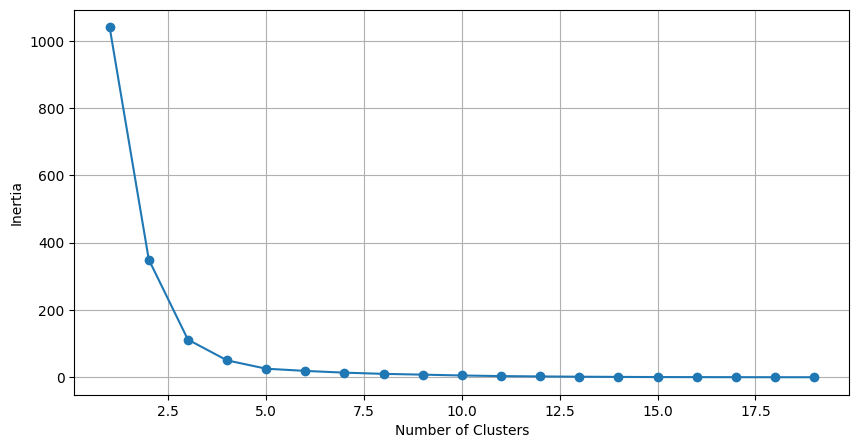

In [684]:
optimise_k_means(movie_features_df,20)

In [685]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(movie_features_df)
# movie_features_df['labels'] = kmeans.labels_

KMeans(n_clusters=5)

In [686]:
#movie_features_df[movie_features_df['labels'] == 4].shape

In [687]:
# randomly picks a movie
query_index = np.random.choice(movie_features_df.shape[0])
print(query_index)
#query_index = 1

618


In [688]:
# from fuzzywuzzy import process
# idx = process.extractOne("2 Days", movie_features_df.index)

# idx

# movie_features_df.

In [689]:
distances, indices = model_knn.kneighbors(movie_features_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

In [690]:
indices

array([[618, 529, 580, 474, 921, 141]], dtype=int64)

In [691]:
movie_features_df.head()
movie_features_df['labels'] = kmeans.labels_

In [692]:


for i in range(0, len(distances.flatten())):
    
    if i == 0:
        print('Recommendations for {0}:\n'.format(movie_features_df.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}: cluster {3}'.
        format(i, movie_features_df.index[indices.flatten()[i]], distances.flatten()[i],movie_features_df['labels'][[indices.flatten()[1]]].values[0]))

Recommendations for Silent Light:

1: Persepolis, with distance of 0.3189268708229065: cluster 3
2: Rope, with distance of 0.48888981342315674: cluster 3
3: Mr. Holland's Opus, with distance of 0.5134538412094116: cluster 3
4: Who Killed Bambi?, with distance of 0.5159773826599121: cluster 3
5: Bridge to Terabithia, with distance of 0.5391000509262085: cluster 3


In [693]:
indices.flatten()[i]

141

In [698]:
movie_features_df[movie_features_df['labels'] == 2].shape



(7, 672)

In [699]:
movie_features_df.head(1)

userId,1,2,3,4,5,6,7,8,9,10,...,663,664,665,666,667,668,669,670,671,labels
title,,,,,,,,,,,,,,,,,,,,,
10 Items or Less,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4
